In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("/home/endershade/Desktop/Python_Course_Repo/lesson_25_tue_06_may/train.csv")

In [2]:
print(df.shape)         # Dimensioni del dataset
print(df.columns)       # Nomi delle colonne
print(df.dtypes)        # Tipi di dato

df.head()               # Prime 5 righe

(750000, 9)
Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')
id              int64
Sex            object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [3]:
df.info()               # Info generali (nulli, tipo colonna)
df.describe()           # Statistiche numeriche (media, std, min, max)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [4]:
for col in df.columns: 
    print(f"{col}: {df[col].nunique()} valori unici") # Numero di valori unici per colonna

id: 750000 valori unici
Sex: 2 valori unici
Age: 60 valori unici
Height: 86 valori unici
Weight: 91 valori unici
Duration: 30 valori unici
Heart_Rate: 63 valori unici
Body_Temp: 75 valori unici
Calories: 277 valori unici


In [ ]:
df["Calories"].value_counts(normalize=True)  # Distribuzione del target=Calories
print(df["Calories"].value_counts(normalize=True).sort_index())  # visualizzazione della distribuzione del target

Calories
1.0      0.000867
2.0      0.003241
3.0      0.006333
4.0      0.008471
5.0      0.005656
           ...   
287.0    0.000060
289.0    0.000043
295.0    0.000108
300.0    0.000043
314.0    0.000035
Name: proportion, Length: 277, dtype: float64


In [6]:
numeric_df = df.select_dtypes(include=['int64', 'float64']).columns.tolist() # Selezione delle feature numeriche
categorical_df = df.select_dtypes(include=['object']).columns.tolist() # Selezione delle feature categoriche

print("Feature numeriche:", numeric_df)
print("Feature categoriche:", categorical_df)

Feature numeriche: ['id', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
Feature categoriche: ['Sex']


In [8]:
new_df = df.copy()
new_df['Sex'] = pd.get_dummies(df['Sex'], drop_first=True)
print(new_df.head())

   id    Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0   True   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  False   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  False   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3   True   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  False   38   166.0    61.0      25.0       102.0       40.6     146.0


                  id       Sex       Age    Height    Weight  Duration  \
id          1.000000 -0.000065  0.002330  0.000101  0.000524  0.001647   
Sex        -0.000065  1.000000  0.009689  0.755906  0.818250 -0.009594   
Age         0.002330  0.009689  1.000000  0.011975  0.073690  0.015656   
Height      0.000101  0.755906  0.011975  1.000000  0.957967 -0.029936   
Weight      0.000524  0.818250  0.073690  0.957967  1.000000 -0.020845   
Duration    0.001647 -0.009594  0.015656 -0.029936 -0.020845  1.000000   
Heart_Rate  0.001092  0.009122  0.017037 -0.013234 -0.002384  0.875327   
Body_Temp   0.001612 -0.015933  0.030275 -0.034641 -0.023717  0.903066   
Calories    0.001148  0.012011  0.145683 -0.004026  0.015863  0.959908   

            Heart_Rate  Body_Temp  Calories  
id            0.001092   0.001612  0.001148  
Sex           0.009122  -0.015933  0.012011  
Age           0.017037   0.030275  0.145683  
Height       -0.013234  -0.034641 -0.004026  
Weight       -0.002384  -0.02

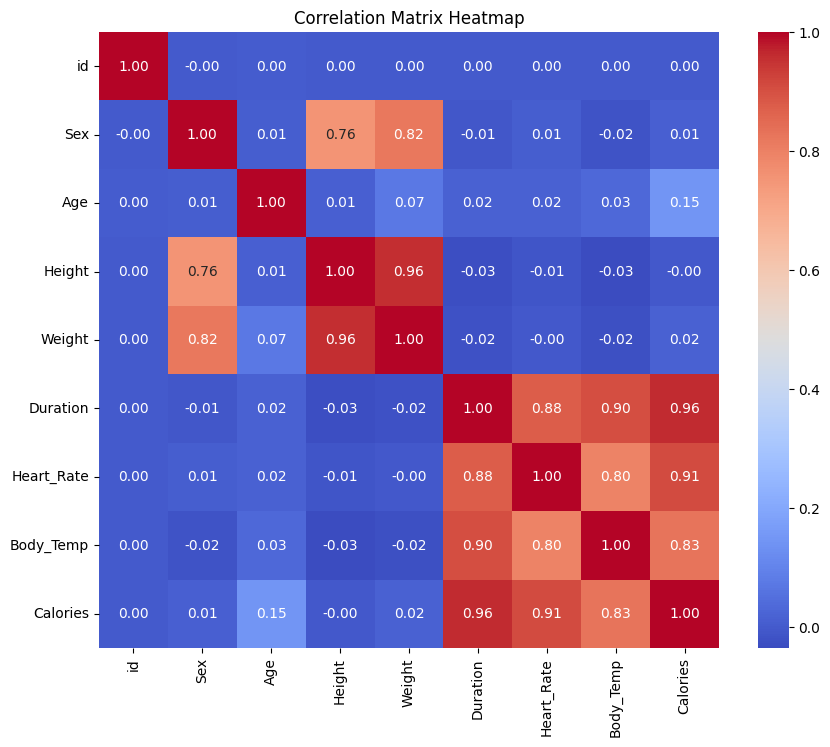

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = new_df.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [15]:
# Eliminazione della colonna 'id'
if 'id' in new_df.columns:
    new_df.drop(columns=['id'], inplace=True)
# aggiunta di due nuove colonne 
new_df['BMI'] = new_df['Weight'] / (new_df['Height'] / 100) ** 2  # Calcolo del BMI
new_df['Calories_per_minute'] = new_df['Calories'] / new_df['Duration']  # Calorie per minuto

#Stampa del nuovo dataframe
print(new_df.head())
# Stampa delle statistiche descrittive del nuovo dataframe
print(new_df.describe())
# Stampa delle informazioni del nuovo dataframe
print(new_df.info())

     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories  \
0   True   36   189.0    82.0      26.0       101.0       41.0     150.0   
1  False   64   163.0    60.0       8.0        85.0       39.7      34.0   
2  False   51   161.0    64.0       7.0        84.0       39.8      29.0   
3   True   20   192.0    90.0      25.0       105.0       40.7     140.0   
4  False   38   166.0    61.0      25.0       102.0       40.6     146.0   

         BMI  Calories_per_minute  
0  22.955684             5.769231  
1  22.582709             4.250000  
2  24.690405             4.142857  
3  24.414062             5.600000  
4  22.136740             5.840000  
                 Age         Height         Weight       Duration  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean       41.420404     174.697685      75.145668      15.421015   
std        15.175049      12.824496      13.982704       8.354095   
min        20.000000     126.000000      36.000000 

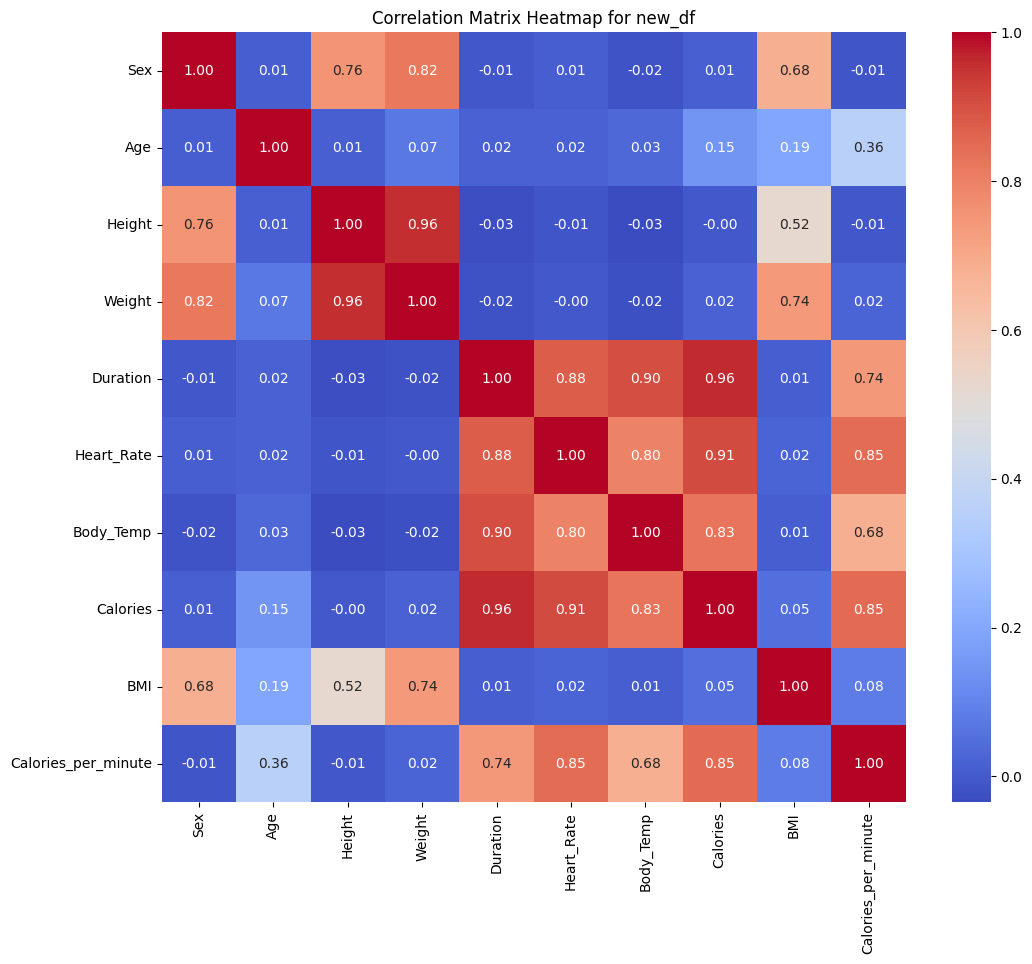

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(new_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap for new_df")
plt.show()

In [17]:
missing_values = new_df.isnull().sum() # Calcolo dei valori mancanti
missing_values = missing_values[missing_values > 0].sort_values(ascending=False) # Filtraggio delle colonne con valori mancanti

print("Valori mancanti per colonna:")
print(missing_values)

Valori mancanti per colonna:
Series([], dtype: int64)


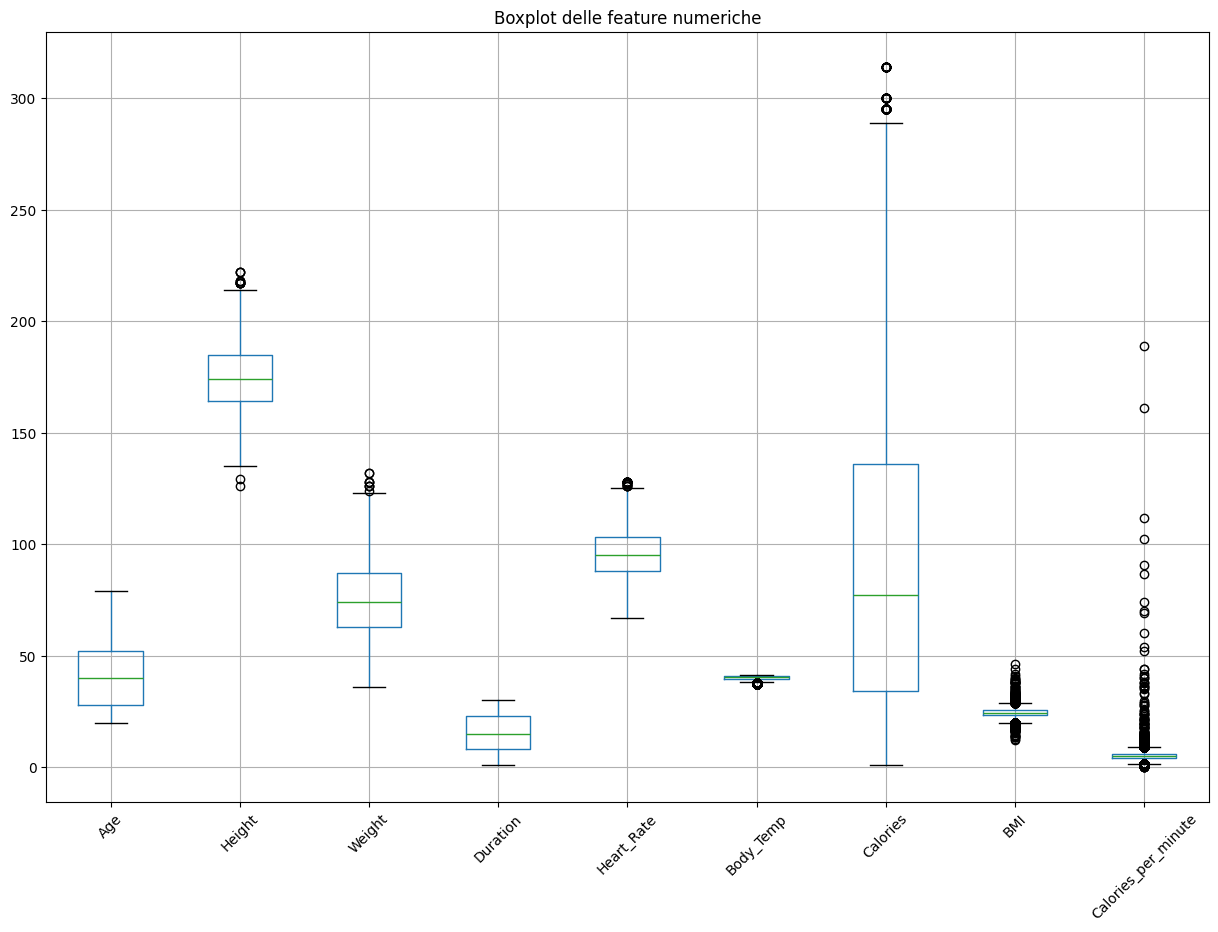

In [20]:

numeric_cols = new_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Escludi colonne non rilevanti
numeric_cols = [col for col in numeric_cols if col != 'id']

# Visualizzazione degli outliers con un boxplot per le feature numeriche
plt.figure(figsize=(15, 10))
new_df[numeric_cols].boxplot()
plt.title("Boxplot delle feature numeriche")
plt.xticks(rotation=45)
plt.show()


In [21]:
# Funzione per rimuovere gli outliers estremi
def remove_extreme_outliers(df, numeric_cols):
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)  # Primo quartile
        Q3 = df[col].quantile(0.75)  # Terzo quartile
        IQR = Q3 - Q1  # Intervallo interquartile
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Applicazione della funzione al dataframe
new_df = remove_extreme_outliers(new_df, numeric_cols)
print(new_df.describe())

                 Age         Height         Weight       Duration  \
count  749806.000000  749806.000000  749806.000000  749806.000000   
mean       41.417191     174.697781      75.144329      15.422375   
std        15.172967      12.823531      13.981640       8.353744   
min        20.000000     129.000000      41.000000       1.000000   
25%        28.000000     164.000000      63.000000       8.000000   
50%        40.000000     174.000000      74.000000      15.000000   
75%        52.000000     185.000000      87.000000      23.000000   
max        79.000000     222.000000     132.000000      30.000000   

          Heart_Rate      Body_Temp       Calories            BMI  \
count  749806.000000  749806.000000  749806.000000  749806.000000   
mean       95.482945      40.036395      88.274450      24.374197   
std         9.449423       0.779764      62.389841       1.507550   
min        67.000000      37.100000       1.000000      16.665033   
25%        88.000000      39.6000

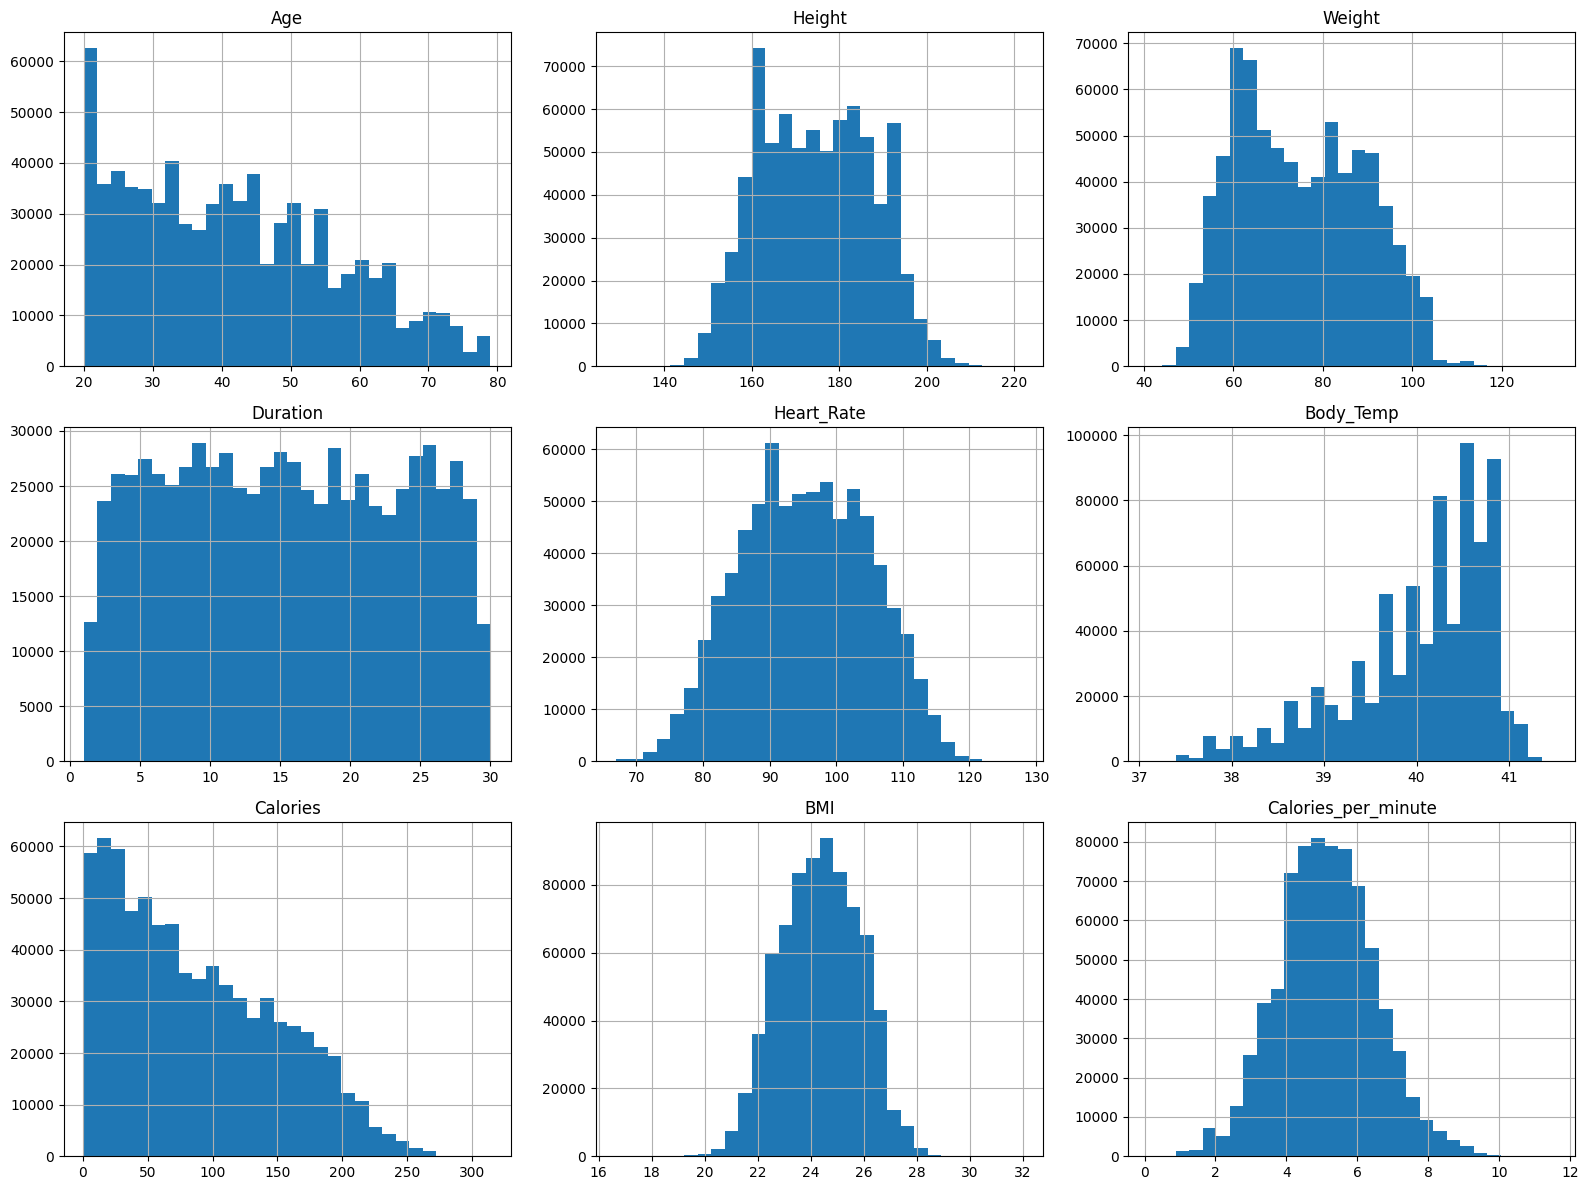

In [22]:
new_df.hist(bins=30, figsize=(16, 12))
plt.tight_layout()
plt.show()

In [25]:
# importing libraries
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

new_df["Sex"] = new_df["Sex"].astype(int)  # True → 1, False → 0
# Seleziona le feature più rilevanti
features = ["Sex", "Age", "Height", "Weight", "Duration", "Heart_Rate", "Body_Temp", "BMI"]

# Separa le feature e il target
X = new_df[features]
y = new_df["Calories"]

# Dividi il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Previsione sul test set
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

# Add the model to the pipeline
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # radice quadrata per ottenere RMSE
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.4f}")

RMSE: 3.60
R^2 Score: 0.9967


In [ ]:
# Import delle librerie necessarie
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Caricamento dei dati (supponiamo che 'new_df' sia già il tuo DataFrame)
# Se necessario, carica il dataset
# new_df = pd.read_csv("path_to_your_data.csv")

# Preprocessing del DataFrame: converte 'Sex' in numerico (0 = False, 1 = True)
new_df["Sex"] = new_df["Sex"].astype(int)

# Seleziona le feature e il target
features = ["Sex", "Age", "Height", "Weight", "Duration", "Heart_Rate", "Body_Temp", "BMI"]
X = new_df[features]
y = new_df["Calories"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisci il modello base XGBoost
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# Definisci la griglia di iperparametri da testare
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 6],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Imposta GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Valutiamo tramite errore quadratico medio
    cv=3,  # 3-fold cross validation
    verbose=1,
    n_jobs=-1  # Usa tutti i core del processore
)

# Esegui GridSearchCV
grid_search.fit(X_train, y_train)

# Mostra i migliori parametri trovati
print("Migliori parametri trovati:")
print(grid_search.best_params_)

# Ottieni il modello con i migliori parametri
best_model = grid_search.best_estimator_

# Valutiamo il modello ottimizzato sui dati di test
y_pred_best = best_model.predict(X_test)

# Calcoliamo le metriche di performance
mse = mean_squared_error(y_test, y_pred_best)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_best)

# Stampa i risultati
print(f"RMSE ottimizzato: {rmse:.2f}")
print(f"R² Score ottimizzato: {r2:.4f}")

# Visualizza l'importanza delle feature
xgb.plot_importance(best_model, importance_type='gain', height=0.5)
plt.title("Importanza delle Feature")
plt.show()

# Utilizzo del BayesSearchCV per l'ottimizzazione degli iperparametri